In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [26]:
ds=pd.read_csv('d:ML--perceptron/data/titanic-train.csv')
print ds.columns
print len(ds.columns)
ds.head()

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
12


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [27]:
cols_to_remove={
    'PassengerId',
    'Name',
    'Cabin',
    'Embarked',
    'Ticket'
}
df=ds.drop(cols_to_remove,axis=1)
print len(df.columns)

df.head()

7


Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [28]:
sex_mapping={
    'male':0,
    'female':1,
}
df.Sex=df.Sex.map(sex_mapping)
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500

In [31]:
data = df.values
print data.shape

df = df.dropna(axis=0)

data = df.values
print data.shape
df.describe()

(714L, 7L)
(714L, 7L)


Survived      Pclass         Sex         Age       SibSp       Parch  \
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000   
mean     0.406162    2.236695    0.365546   29.699118    0.512605    0.431373   
std      0.491460    0.838250    0.481921   14.526497    0.929783    0.853289   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   20.125000    0.000000    0.000000   
50%      0.000000    2.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    1.000000   
max      1.000000    3.000000    1.000000   80.000000    5.000000    6.000000   

             Fare  
count  714.000000  
mean    34.694514  
std     52.918930  
min      0.000000  
25%      8.050000  
50%     15.741700  
75%     33.375000  
max    512.329200

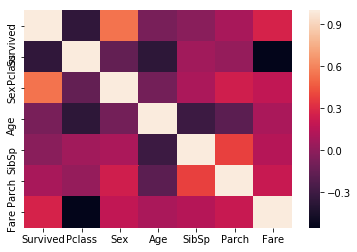

In [33]:
plt.figure()
sns.heatmap(df.corr())

In [37]:
X=data[:,1:] ##input
Y=data[:,0]  ##labels

print X.shape
print Y.shape

split=int(0.8*X.shape[0])

X_train=X[:split]
Y_train=Y[:split]

X_test=X[split:]
Y_test=Y[split:]

print"---"

print X_train.shape
print Y_train.shape

print X_test.shape
print Y_test.shape

(714L, 6L)
(714L,)
---
(571L, 6L)
(571L,)
(143L, 6L)
(143L,)


In [38]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print dt.score(X_test,Y_test)

##Random forest:
rf=RandomForestClassifier(n_estimators=145)
rf.fit(X_train,Y_train)
print rf.score(X_test,Y_test)

0.7972027972027972
0.8601398601398601


In [51]:
## Implementing our own Decision Tree as :-
print data.shape

def data_split(dataset, col, value):
    data_right=[]
    data_left=[]
    
    for ix in range(dataset.shape[0]):
        
        if dataset[ix,col] > value:
            data_right.append(data[ix,:])
        else:
            data_left.append(data[ix,:])
    return np.array(data_right),np.array(data_left)
        
def entropy(dataset,col=0):
    p=[]
    
    p_survive=dataset[:,col].mean()
    p.append(p_survive)
    
    p.append(1-p[0])
    
    ent=0.0
    for px in p:
        ent += (-1.0*px*np.log2(px))
        
    return ent

def information_gain(dataset,subset):
    return entropy(dataset)-entropy(subset)

def information_gain2(dataset,left_subset,right_subset):
    ## Basically just controlling any empty subset by returning -ve gain
    left=left_subset
    right=right_subset
    
    h_data=entropy(dataset)
    if left.shape[0]>0:
        left_gain=h_data-entropy(left)
    else:
        left_gain=-100000
    
    if right.shape[0]>0:
        right_gain=h_data-entropy(right)
    else:
        right_gain=-100000
    
    total_gain=right_gain+left_gain
    return total_gain

(714L, 7L)


In [64]:
INFINITY= -1000000

class DT:
    def __init__(self,depth,max_depth):
        self.right=None
        self.left=None
        self.col_id=None
        self.value=None
        self.depth=depth
        self.max_depth=max_depth # what's this?
    
    def select_attr_And_run(self,dataset):
        ## Exit condition
        if self.depth>=self.max_depth:
            return
        n_cols=6
        start_index=1
        check_index=0

        all_gains=[]

        for cx in range(start_index,start_index+n_cols):
            split_val=dataset[:,cx].mean() #why splitting about mean?
            right,left=data_split(dataset,cx,split_val)

            if left.shape[0]>0:
                left_gain=information_gain(dataset,left)
            else:
                left_gain=INFINITY
            if right.shape[0]>0:
                right_gain=information_gain(dataset,right)
            else:
                right_gain=INFINITY

            comb_gain=right_gain+left_gain
            all_gains.append(comb_gain)

        all_gains=np.array(all_gains)
        self.col_id=np.argmax(all_gains)+start_index
        self.value=dataset[:,self.col_id].mean()

        data_right,data_left=data_split(dataset,self.col_id,self.value)

        if data_right.shape[0]>0:
            self.right=DT(self.depth+1,self.max_depth)
            self.right.select_attr_And_run(data_left)

        return
    
    def predict(example):
        ## eg of shape: (1,#features)
        ##here -> (1,6)
        pass

In [65]:
print data.shape
dt=DT(depth=0,max_depth=5)
dt.select_attr_And_run(data)

(714L, 7L)
